In [1]:
import sys 
sys.path.append('..')

In [2]:
import argparse
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import pytorch_lightning as pl
from PIL import Image
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM,PreTrainedTokenizerFast, GPT2Tokenizer
from PIL import Image
from tqdm import tqdm as tqdm
import torchvision.transforms as T





In [3]:
from src.datasets.imageclef_dataset import ImageCLEF2021DataModule

In [4]:

augmentations = {
    
    'train': T.Compose([T.Resize((224,224)),
                        T.ToTensor(),
                        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]),
    'val': T.Compose([T.Resize((224,224)),
                        T.ToTensor(),
                        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]),
    'test': T.Compose([T.Resize((224,224)),
                        T.ToTensor(),
                        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]),
}

In [5]:
hyperparameters = {
    "root": "/Users/caghankoksal/Desktop/imageclef/",
    "batch_size": 32,
    "tokenizer": "gpt2",
    "return_size": False,
    "num_data_workers": 0,
    "answers_list_path":'/Users/caghankoksal/Desktop/SS2022/mlmi-vqa/data/external/answer_list_imageclef.txt'
}

In [6]:
imageclef_datamodule = ImageCLEF2021DataModule(**hyperparameters,transforms=augmentations)

In [7]:
imageclef_datamodule.train_dataset[221]["qa_pair"]

'<|endoftext|> <image> question: what abnormality is seen in the image? answer: aortic dissection <EOC>'

In [8]:
imageclef_datamodule.train_dataset[221]["answer"]

'aortic dissection'

In [9]:
imageclef_datamodule.train_dataset[221]["label"]

270

In [ ]:
# Write set to file
with open("answer_list_imageclef.txt", "w") as f:
    for each in answer_list:
        f.write(each + "\n")

with open("answer_list_imageclef.txt", "r") as f:
    lines = f.readlines()
    lines = [each.strip() for each in lines]
    answer_list_read = lines

In [10]:
cur_img = imageclef_datamodule.train_dataset[221]["image"]
cur_img

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [11]:
from torch import Tensor


def denormalize_img(img : Tensor, mean = Tensor([ 0.485, 0.456, 0.406 ]), std = Tensor([ 0.229, 0.224, 0.225 ])):
    """
    Denormalize an image given the mean and std of the dataset
    img : Tensor: 
    """
    invTrans = T.Compose([T.Normalize(mean = [ 0., 0., 0. ], std = 1/std),
                      T.Normalize(mean = -mean, std = [ 1., 1., 1. ])])
    inv_tensor = invTrans(img)
    
    return inv_tensor


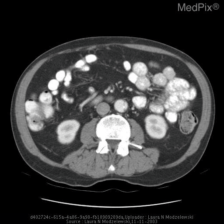

In [12]:
denormalized_img = denormalize_img(img=cur_img)
T.ToPILImage()(denormalized_img)

In [13]:
train_loader = imageclef_datamodule.train_dataloader()
val_loader = imageclef_datamodule.val_dataloader()